# Kelvin Helmholtz instability in a periodic shear layer

When two stream flow parallel to each other but at different speeds, also known as shear layer, a dramatic formation of large scale structures may emerge.
<img src='clouds.jpeg' width='500'>
*Figure 1. Kelvin-Helmholtz vortices observed in clouds above Portland from [kgw.com](https://www.kgw.com/gallery/news/uploaded-gallery/283-f6a341da-1180-4e0d-8113-2ea8d0450b71)*

The quasi-periodic swirl sometimes observed in clouds, like in Fig. 1, is a manifestation of an instability called Kelvin-Helmholtz instability, which is sketched in Fig. 2.

<img src="KH.png" width="500">
*Figure 2. Sketch depicting the evolution and mechanism of Kelvin-Helmholtz instability in a shear layer, defined by two parallel streams with different velocities. Here we define the upper stream as slow flow and the lower as fast flow. As perturbations grow in a shear layer, a wave forms at the interface of the two streams. This wave causes local pressure gradients, which later devolve into the downward flux of slow momentum into the fast stream and upward flux of high momentum in the slow stream. These upward and downward motions cuve in a swirling pattern, resulting in observations such as Fig. 1.*

The goal of this notebook is to study the evolution of simulated shear layer in a periodic domain. The domain is $28\delta\times28\delta$, with an initial base flow defined by the velocity and scalar distributions:

$$
u(x,y,t=0)=\frac{U_0}{2}\tanh\frac{2y}{\delta_0}\,,
$$
$$
v(x,y,t=0)=0\,,
$$
\theta(x,y,t=0)=\frac{\Theta_0}{2}\left(1-\tanh\frac{2y}{\delta_0}\right)\,.
$$

The Reynolds number is based on the velocity difference between the two streams $\Delta U = U_0$ and the shear layer thickness $\delta_0$:

$$
Re=\frac{U_0\delta_0}{\nu}
$$

## Objective:
Show and discuss:
* The temporal evolution of the contribution of the vertical velocity component to the total turbulent kinetic energy averaged over the entire domain.
* The temporal evolution of mean velocity, RMS of velocity fluctuations, mean vorticity and RMS of vorticity fluctuations, spaced-averaged in the $x$-direction over each flow fields at $y=0$.
* The emergence of the instability length scale using power spectral density function and the similarities and differences between the evolution the scalar fluctuations and the velocity fluctuations.

## Notebook help

Python is highly recommended for all 1D and 2D plots in this class. You can learn some useful tricks [here](https://matplotlib.org/stable/tutorials/text/mathtext.html)

## Data

Simulations were performed with the code [dedalus v2](https://github.com/DedalusProject/dedalus/tree/v2_master). Hereafter, the parameters $U_0$, $\delta_0$ and $\Theta_0$ are unity in their own dimensions.  The domain spans $-14\leq x\leq+14$ and $-14\leq y\leq+14$. The flow is periodic in $x$. In the direction $y$, the streamwise velocity $u$ and the temperature are imposed, 
$$u(x,y=\pm14,t)=\pm 1/2$$
$$\theta(x,y=-14,t)=1,\;\;\theta(x,y=+14,t)=0\,,$$
and the boundary condition on the vertical velocity is no-stress, 
$$\partial u/\partial\vert_{y=\pm14}=0\,.$$
Starting the simulation with the initial condition provided above, supplemented with random white noise on both velocity directions, the simulations runs for $T=400\delta_0/U_0=400$. Snapshots are available with a period of $1\delta_0/U_0$ using the code below.

## Analysis

In a larger domain, the $x$-direction would qualify as **homogeneous**, which means that statistics are **independent** of that direction. Homogeneous directions allow for spatial averaging, defined below for any variable $a$

$$
\left\langle a\right\rangle_{(y,t)}=\frac{1}{L_x}\int_{-L_x/2}^{L_x/2}a(x,y,t)dx\,.
$$

As it runs, the simulation stores domain-average quantites, such as the square of the vertical velocity:

$$
\left\langle v^2\right\rangle_{(t)}=\frac{1}{L_xL_y}\int_{-L_y/2}^{L_y/2}\int_{-L_x/2}^{L_x/2}\left(v(x,y,t)\right)^2dx\,.
$$



In [12]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import natsort

fname = "Re1e2_tseries_00/Re1e2_tseries_00_s1.h5"
f = h5py.File(fname,"r")
print(f['scales'].keys())
print(f['tasks'].keys())
t = f['scales']['sim_time'][:]
vv = f['tasks']['<vv>'][:,0,0]
tke = f['tasks']['<tke>'][:,0,0]
P = f['tasks']['<P>'][:,0,0]
eps = f['tasks']['<eps>'][:,0,0]
f.close()

<KeysViewHDF5 ['(T,T)z', 'constant', 'iteration', 'kx', 'sim_time', 'timestep', 'wall_time', 'world_time', 'write_number', 'x', 'z']>
<KeysViewHDF5 ['<Nu>', '<P>', '<eps>', '<tke>', '<vv>']>


In [20]:
#Testing to See if i can import my own.h5 files. 
import numpy as np
import matplotlib.pyplot as plt
import h5py
import natsort

fname = "nx2_run/drop.sol000005_1.sol.h5"
f = h5py.File(fname,"r")
print(f['Data'].keys())
print(f['States'].keys())
#t = f['States']['TOTAL_TIME'][:]
#vv = f['tasks']['<vv>'][:,0,0]
#tke = f['tasks']['<tke>'][:,0,0]
#P = f['tasks']['<P>'][:,0,0]
#eps = f['tasks']['<eps>'][:,0,0]
f.close()



<KeysViewHDF5 ['ABS_NODEVOL', 'BND_FLAG', 'CFL', 'COMPUTED_GRAVITY', 'DELTA_PAIRBASED', 'DIV_U', 'DT', 'ELGRP_COLOR', 'FOURIER', 'GRADU', 'GRAVITY', 'GRAVITY_MODULATION', 'HALF', 'KE', 'KE_MEAN', 'KE_RMS', 'LINSOL_POISSON_RHS', 'LS_BAND', 'LS_BAND0', 'LS_CURVATURE', 'LS_DISTANCE', 'LS_DPHI_LOSS_DT', 'LS_EPSILON', 'LS_GAUSS_CURVATURE', 'LS_NODE_NORMALS', 'LS_PHI', 'LS_PHI_LOSS', 'LS_SOURCE_TERM', 'LS_SPONGE_LAYER_MASK', 'MOMENTUM_SOURCE', 'NITER', 'NORM_U', 'NU', 'NUMBER_OF_NEIGHBOURS', 'NU_ARTIF', 'NU_GAS', 'NU_LIQUID', 'NU_T', 'P', 'PROC_COLOR', 'P_GRAD', 'P_MEAN', 'P_RMS', 'REMAINING_VOLUME_SOURCE', 'RHO', 'RHO_STAR', 'SKEWNESS', 'SOLVER_TYPE', 'SPONGE_LAYER_MASK', 'STN', 'SUBELGRP_COLOR', 'SURFACE_TENSION', 'TIME', 'TOTAL_NITER', 'TOTAL_NITER_AFTER_ADAPT', 'TOTAL_TIME', 'U', 'U_LIQ', 'U_LIQ_MEAN', 'U_LIQ_RMS', 'U_MEAN', 'U_RMS', 'U_STAR', 'VOLUME_SOURCE']>
<KeysViewHDF5 []>


In [34]:
import pandas as pd

# Define the path to your .dat file
file_path = 'liquid_volume_long.dat'

# Initialize lists to store headers and data rows
headers = []
data_rows = []

# Read the file and parse the headers and data
with open(file_path, 'r') as f:
    for line in f:
        if line.startswith('#'):
            # Parse the header line
            headers = list(filter(lambda x: x != '', line.replace('#', '').replace('\n', '').split()))
        else:
            # Parse data lines
            data_rows.append(list(map(float, filter(lambda x: x != '', line.split()))))

# Extract valid column names from the headers
col_names = []
for header in headers:
    parts = header.split(':')
    if len(parts) == 2:
        col_names.append(parts[1].strip())
    else:
        print(f"Skipping invalid header: {header}")

# Convert the list of data rows to a pandas DataFrame
data = pd.DataFrame(data_rows, columns=col_names)

# Print the DataFrame to verify
print(data)

# Optionally, save the DataFrame to a CSV file
data.to_csv('extracted_data4.csv', index=False)


Skipping invalid header: 1
Skipping invalid header: 2
Skipping invalid header: 3
Skipping invalid header: 4
Skipping invalid header: 5
Skipping invalid header: 6
Skipping invalid header: 7
           Niter      time  total_Niter  total_time   liq_vol  pressure_flc  \
0            1.0  0.000005          1.0    0.000005  0.000006     10.953654   
1            2.0  0.000009          2.0    0.000009  0.000006     10.946635   
2            3.0  0.000014          3.0    0.000014  0.000006     10.943211   
3            4.0  0.000018          4.0    0.000018  0.000006     10.939958   
4            5.0  0.000023          5.0    0.000023  0.000006     10.937599   
...          ...       ...          ...         ...       ...           ...   
148600  148601.0  0.999976     148601.0    0.999976  0.000006     12.415256   
148601  148602.0  0.999983     148602.0    0.999983  0.000006     12.415253   
148602  148603.0  0.999990     148603.0    0.999990  0.000006     12.415251   
148603  148604.0  0.9

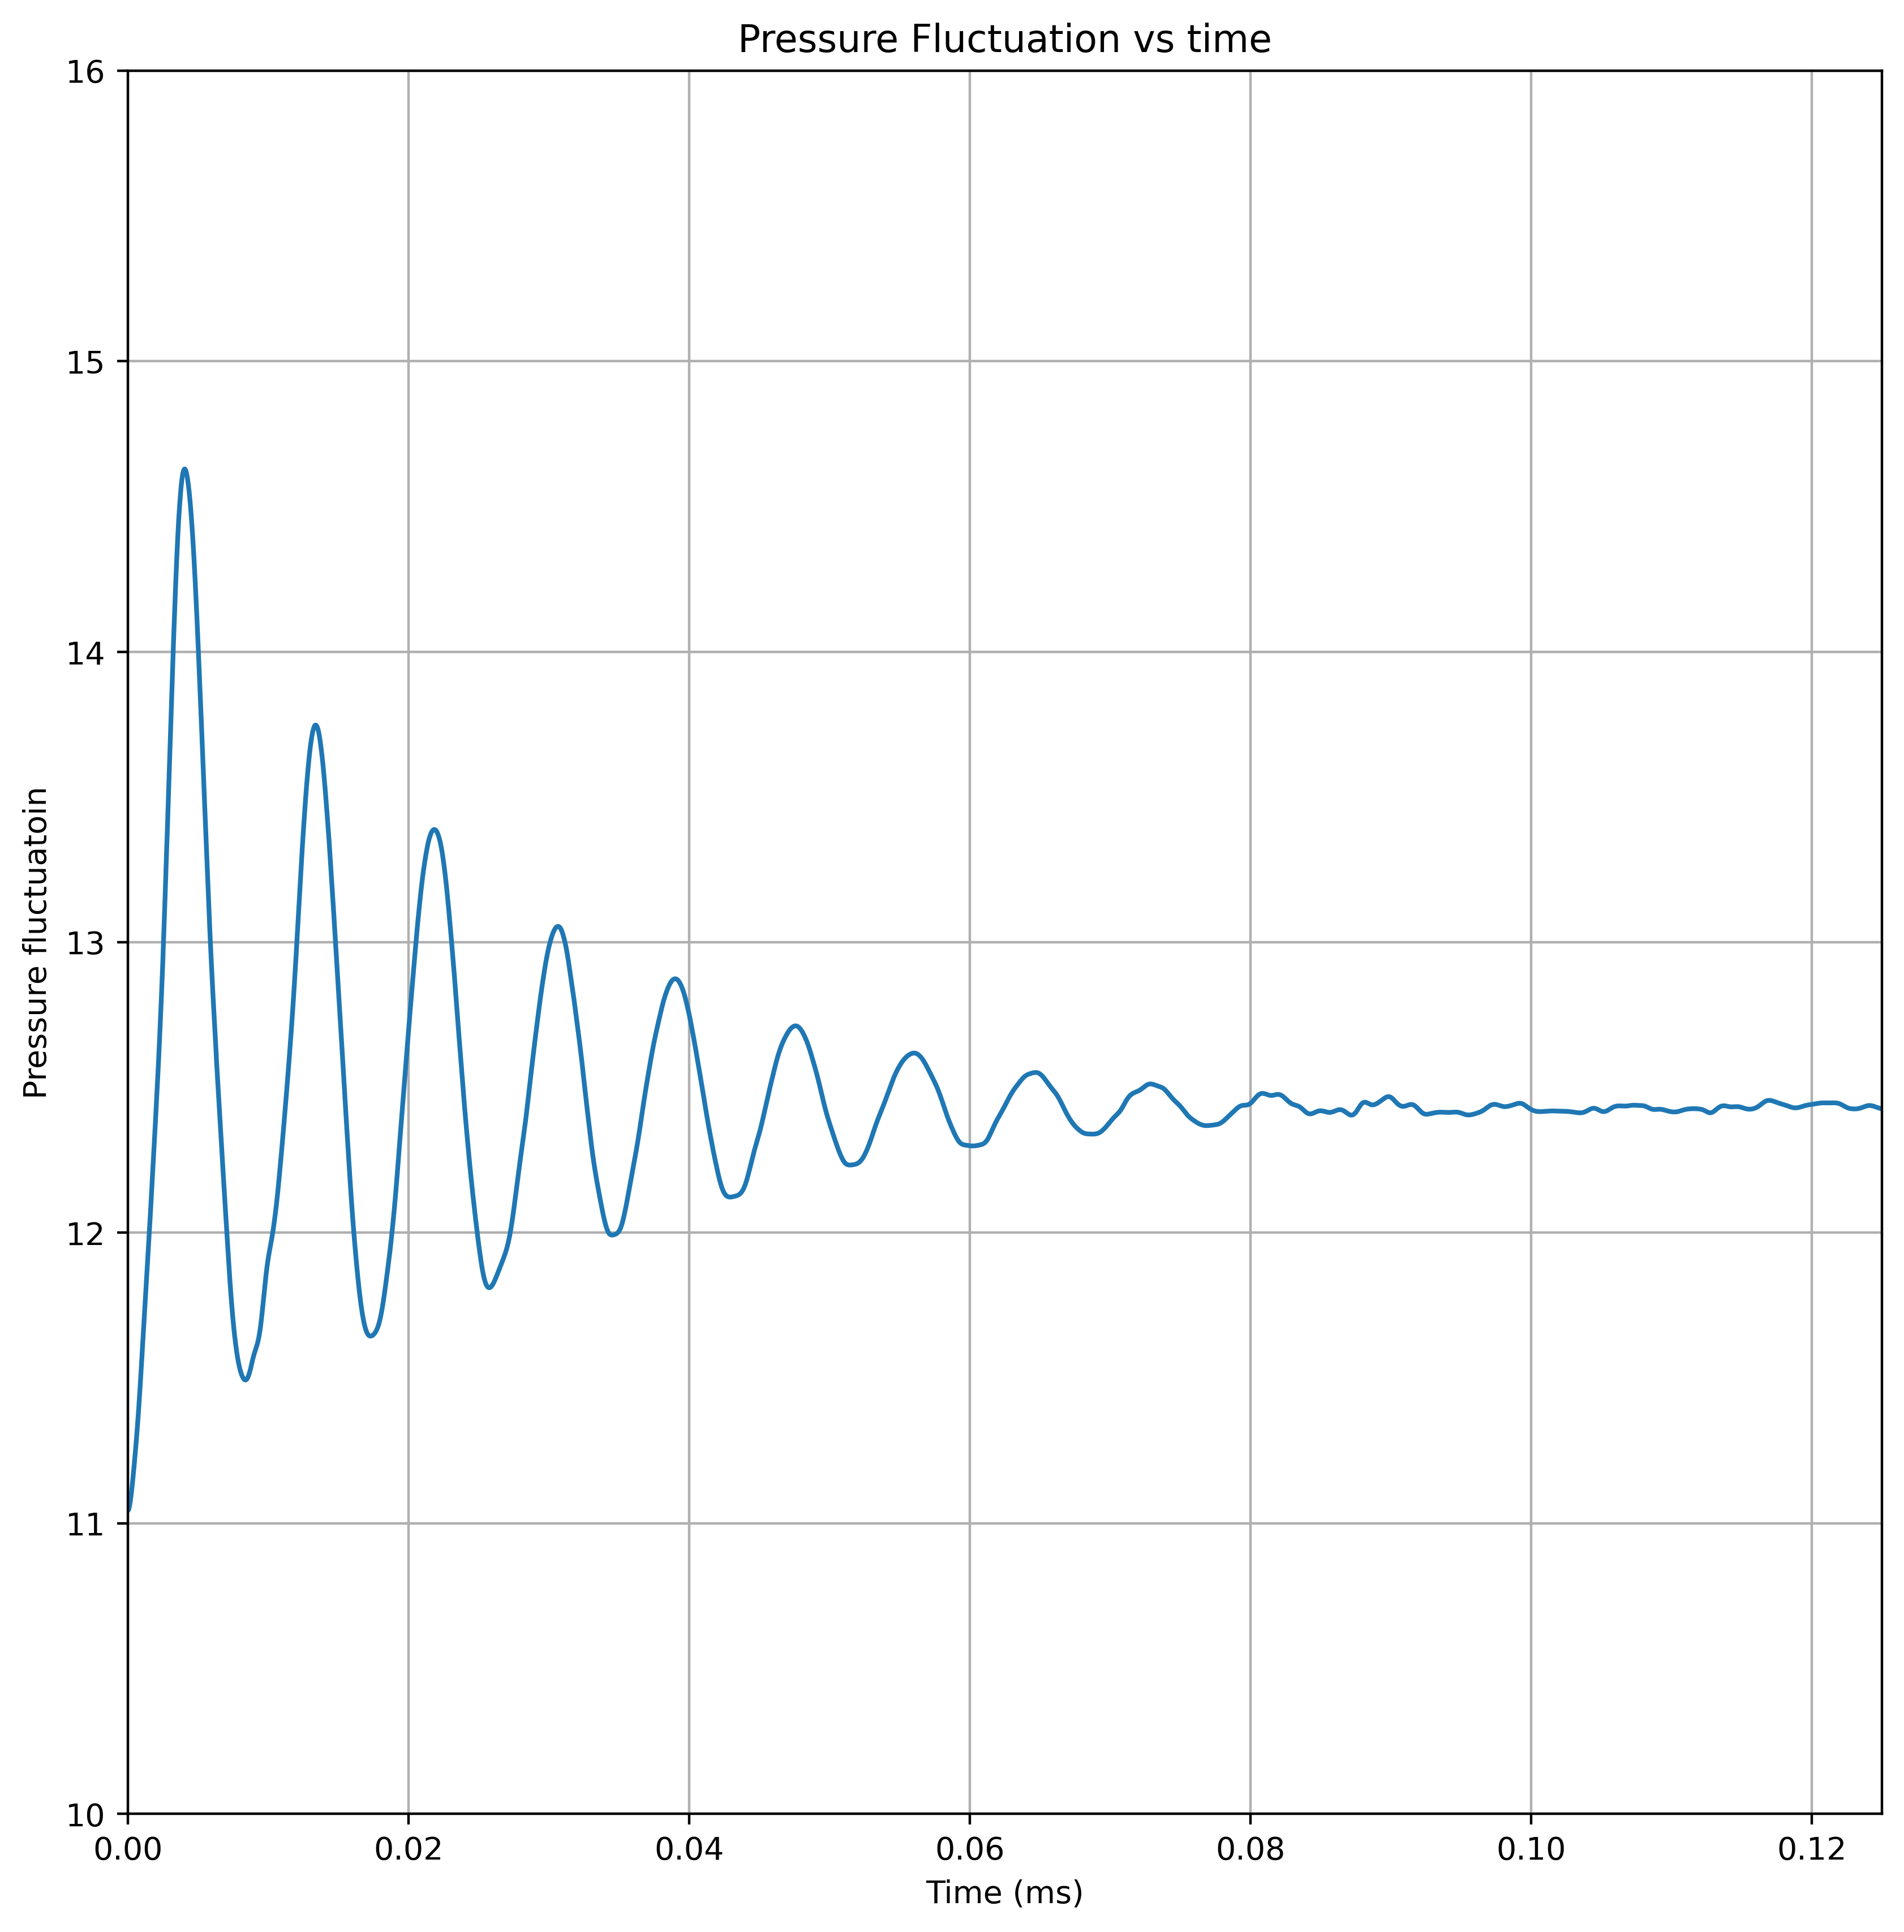

In [77]:
# Simple plotting, Pressure FLCT 
import pandas as pd
import matplotlib .pyplot as plt 
from scipy.ndimage import gaussian_filter1d

df = pd.read_csv('extracted_data4.csv')
#print(df['time'])
#print(df['pressure_flc'])
t = df['time']
pressure = df['pressure_flc']
 
sigma = 50
filter_p = gaussian_filter1d(pressure,sigma)


fig, ax = plt.subplots(figsize=(10,10),dpi=400)
ax.plot(t,filter_p)

ax.set(xlabel='Time (ms)', ylabel = 'Pressure fluctuatoin', title = 'Pressure Fluctuation vs time')
ax.set_xlim(0,0.125)
ax.set_ylim(10,16)
ax.grid()



https://matplotlib.org/stable/tutorials/text/mathtext.html

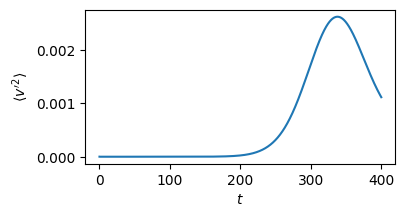

In [3]:
# plt.rcParams.update({
#     "text.usetex": True,})
plt.figure(figsize=(4,2),dpi=100)
plt.plot(t,vv)
plt.xlabel(r"$t$")
plt.ylabel(r"$\langle v'^2\rangle$")
plt.show()

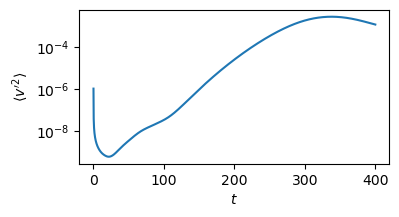

In [3]:

plt.figure(figsize=(4,2),dpi=100)
plt.semilogy(t,vv)
plt.xlabel(r"$t$")
plt.ylabel(r"$\langle v'^2\rangle$")
plt.show()

In [4]:
def read_snapshots(foldername,filename):
    fname = foldername + filename
    f = h5py.File(fname, "r")
#     print(f['scales'].keys())
#     print(f['tasks'].keys())
    p = f['tasks']['p']
    x = p.dims[1][0]
    y = p.dims[2][0]
    simtime = p.dims[0]['sim_time'][:]
    xgrid, ygrid = np.meshgrid(x,y, sparse=False, indexing = 'ij')
    u = f['tasks']['u'][:]
    v = f['tasks']['w'][:]
    dxu = f['tasks']['ux'][:]
    dyu = f['tasks']['uz'][:]
    dxv = f['tasks']['wx'][:]
    dyv = f['tasks']['wz'][:]
    p = f['tasks']['p'][:]
    b = f['tasks']['b'][:]
    dxb = f['tasks']['bx'][:]
    dyb = f['tasks']['bz'][:]
    f.close()
    return x,y,xgrid,ygrid,u,v,dxu,dyu,dxv,dyv,p,b,dxb,dyb,simtime

In [37]:
x,y,xgrid,ygrid,u,v,dxu,dyu,dxv,dyv,p,b,dxb,dyb,simtime = read_snapshots("Re1e2_00/","Re1e2_00_s9.h5")

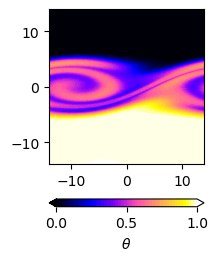

In [38]:
mycmap = 'gnuplot2'
nsnap = -1
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True,figsize=(2,3),dpi=100)
var = b[nsnap,:,:]
# c00 = axs.pcolormesh(xgrid,ygrid,var,cmap=mycmap, shading = 'gouraud', 
#     vmin = var.min(), vmax = var.max() )
levs = np.linspace(0,1,51)
c00 = axs.contourf(xgrid,ygrid,var,cmap=mycmap,  
        vmin = 0, vmax = 1, extend='both',levels = levs)
fig.colorbar(c00,ax=axs,orientation='horizontal',ticks = [0., 0.5, 1], label = r"$\theta$")
# axs[0,0].set_xlabel('x')
# axs[0,0].set_ylabel('y')
# axs.set_title(r"$\theta$")
axs.set_aspect('equal')
plt.show()

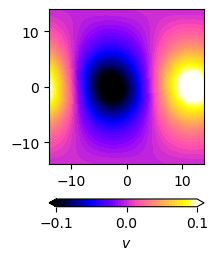

In [39]:
nsnap = -1
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True,figsize=(2,3),dpi=100)
var = v[nsnap,:,:]
# c00 = axs.pcolormesh(xgrid,ygrid,var,cmap=mycmap, shading = 'gouraud', 
#     vmin = var.min(), vmax = var.max() )
levs = np.linspace(-0.1,0.1,51)
c00 = axs.contourf(xgrid,ygrid,var,cmap=mycmap,  
        vmin = levs.min(), vmax = levs.max(), extend='both',levels = levs)
fig.colorbar(c00,ax=axs,orientation='horizontal',ticks = [levs.min(), np.mean(levs), levs.max()], label = r"$v$")
# axs[0,0].set_xlabel('x')
# axs[0,0].set_ylabel('y')
# axs.set_title(r"$\theta$")
axs.set_aspect('equal')
plt.show()

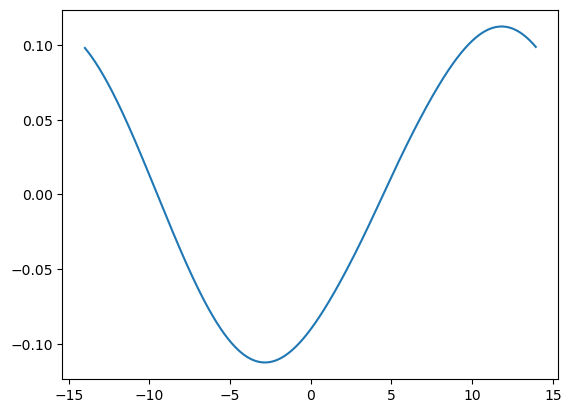

In [40]:
plt.plot(xgrid[:,0], v[-1,:,v.shape[2]//2])

In [55]:
n = -1
j = v.shape[2]//2
Dx = xgrid[1,0] - xgrid[0,0]
kx = np.fft.rfftfreq(b.shape[1],Dx)
phihat = np.fft.rfft(b[n,:,j])
E = np.abs(phihat)**2*Dx/b.shape[1]
E[1:-2] *= 2
if kx[-1] != (1 / (2.0*Dx)):
    E[-1] *= 2
# E /= np.var(v[n,:,j])

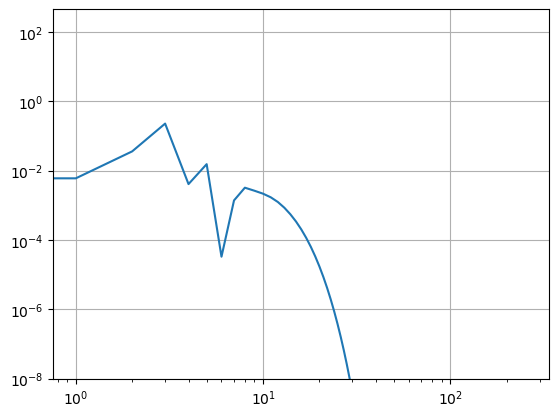

In [59]:
plt.loglog(kx*28,E)
# plt.xlim(0,4)
plt.ylim(1e-8,)
plt.grid(True)

In [48]:
Lx = 28.
Nx = 64
dx = Lx/Nx
n = 4
x = np.arange(0,Nx,1)*dx
y = np.sin(2*np.pi*n/Lx*x)
def psd1D(x,y):
    dx = x[1] - x[0]
    kx = np.fft.rfftfreq(x.shape[0],dx)
    phihat = np.fft.rfft(y)
    E = np.abs(phihat)**2*dx/x.shape[0]
    E[1:-2] *= 2
    if kx[-1] != (1 / (2.0*dx)):
        E[-1] *= 2
    return kx,E

In [49]:
kx,E = psd1D(x,y)

(0.0, 5.0)

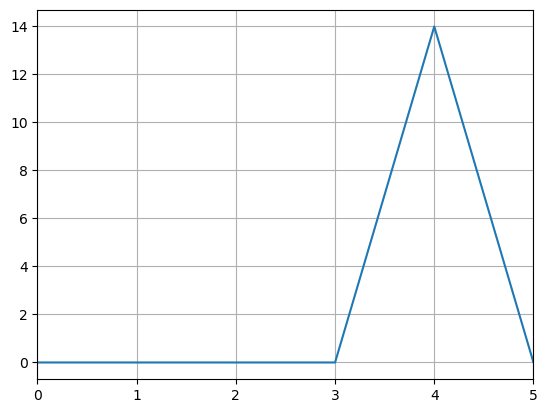

In [54]:
plt.plot(kx*Lx,E)
plt.grid(True)
plt.xlim(0,5)

In [25]:
np.var(y)

0.5